In [13]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Download necessary NLTK resources
import nltk

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\PC-
[nltk_data]     LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\PC-
[nltk_data]     LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\PC-
[nltk_data]     LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
nltk.download('averaged_perceptron_tagger')nltk.download('punkt')

SyntaxError: invalid syntax (2819097462.py, line 1)

In [19]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to C:\Users\PC-
[nltk_data]     LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\PC-
[nltk_data]     LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to C:\Users\PC-
[nltk_data]     LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


True

In [22]:
nltk.download('brown')

[nltk_data] Downloading package brown to C:\Users\PC-
[nltk_data]     LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [23]:
# Load the CSV file
import pandas as pd
df = pd.read_csv('C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\Text Mining\\Elon_musk.csv', encoding='latin1')

In [24]:
# Basic PreProcessing
df['Tweets'] = df['Text'].str.replace(r'@\w+', '')

In [25]:
tweets = [Text.strip() for Text in df.Tweets]

In [26]:
# Combining all the tweets into a single text
combined_text = ''.join(tweets)

In [27]:
# Clean Text
import re
import string

In [28]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [29]:
cleaned_text = clean_text(combined_text)

In [30]:
# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [31]:
cleaned_text = remove_emoji(cleaned_text)

In [32]:
# Preprocess text using NLTK
from nltk.corpus import stopwords

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\PC-
[nltk_data]     LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
stop_words = set(stopwords.words('english'))

In [35]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [36]:
from nltk.tokenize import word_tokenize

In [37]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    text = ' '.join(tokens)
    return text

In [38]:
df['cleaned_text'] = df['Tweets'].apply(preprocess_text)

In [39]:
# Sentiment Analysis
from textblob import TextBlob

In [8]:
!pip install -U textblob

In [40]:
def get_textblob_sentiment(cleaned_text):
    analysis = TextBlob(cleaned_text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [42]:
def get_vader_sentiment(cleaned_text):
    sid = SentimentIntensityAnalyzer()
    compound_score = sid.polarity_scores(cleaned_text)['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [43]:
df['textblob_sentiment'] = df['cleaned_text'].apply(get_textblob_sentiment)
df['vader_sentiment'] = df['cleaned_text'].apply(get_vader_sentiment)

In [44]:
# Check for missing values
missing_values = df.isnull().sum()

In [45]:
missing_values_column = df['Text'].isnull().sum()

In [46]:
# Print missing values
print("Missing Values in the Entire Dataset:")
print(missing_values)

Missing Values in the Entire Dataset:
Unnamed: 0            0
Text                  0
Tweets                0
cleaned_text          0
textblob_sentiment    0
vader_sentiment       0
dtype: int64


In [47]:
print("\nMissing Values in a Specific Column:")
print(missing_values_column)


Missing Values in a Specific Column:
0


In [48]:
# Explore data distribution of sentiment labels
sentiment_distribution = df['vader_sentiment'].value_counts()


In [49]:
# Plotting the distribution
import matplotlib.pyplot as plt

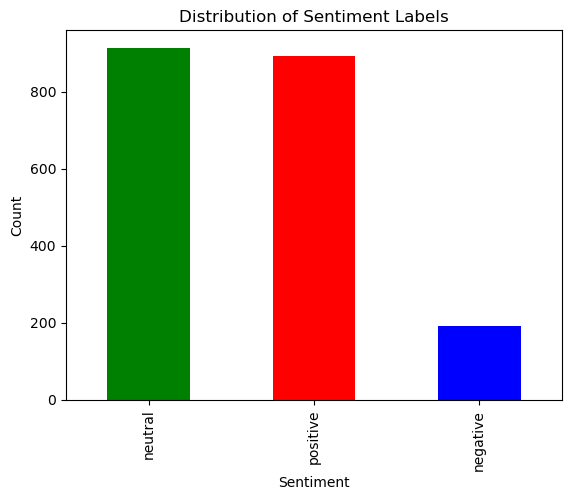

In [50]:
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [51]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['cleaned_text'], df['vader_sentiment'], test_size=0.2, random_state=42)

In [52]:
# Text Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
vectorizer = TfidfVectorizer(max_features=5000)

In [54]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [55]:
# Train a Sentiment Analysis Model
from sklearn.naive_bayes import MultinomialNB

In [56]:
model = MultinomialNB()

In [57]:
model.fit(X_train_tfidf, Y_train)

MultinomialNB()

In [58]:
predictions = model.predict(X_test_tfidf)

In [59]:
# Evaluate accuracy
from sklearn.metrics import accuracy_score

In [60]:
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")                      # Accuracy: 0.755

Accuracy: 0.755


In [61]:
# Generate WordCloud
from wordcloud import WordCloud

In [62]:
all_text = ' '.join(df['cleaned_text'])

In [63]:
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(all_text)

In [64]:
# Plot WordCloud image
import matplotlib.pyplot as plt

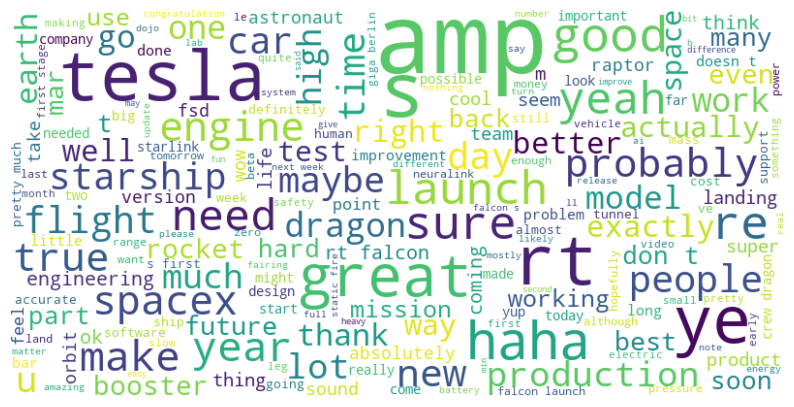

In [65]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [66]:
# Sentiment Analysis for New Text
new_text = "I really enjoyed the movie. It was fantastic!"

In [67]:
new_text_processed = preprocess_text(new_text)
new_text_vectorized = vectorizer.transform([new_text_processed])

In [68]:
prediction = model.predict(new_text_vectorized)[0]
print(f"Predicted Sentiment: {prediction}")

Predicted Sentiment: positive


In [69]:
# Distribution of Text Lengths:
df['text_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

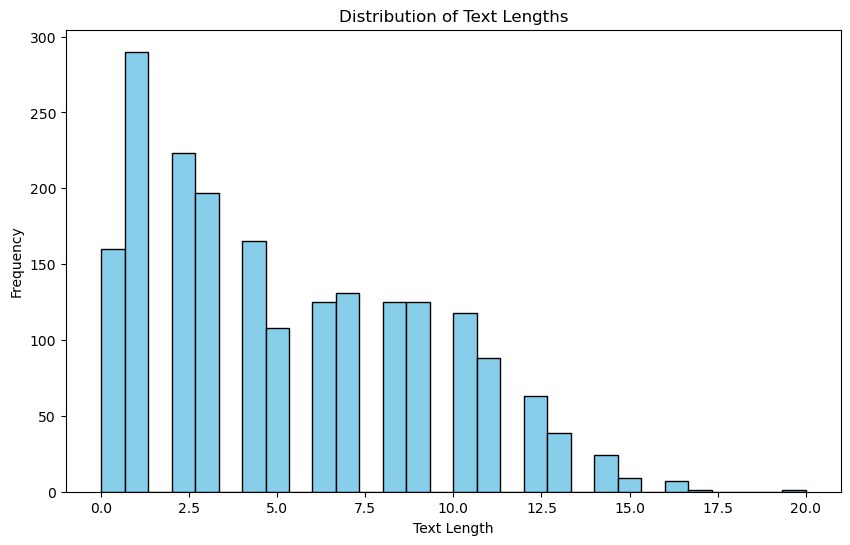

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [71]:
# Word Frequency Plot
from collections import Counter

In [72]:
words_counter = Counter(' '.join(df['cleaned_text']).split())
common_words = words_counter.most_common(20)

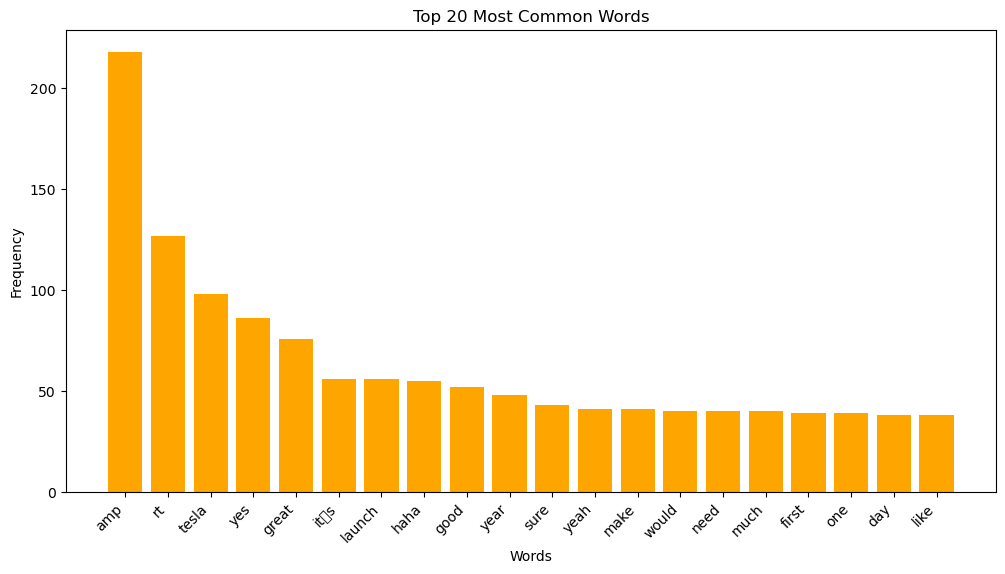

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in common_words], [count[1] for count in common_words], color='orange')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [74]:
#===================================================================================
# Sentiment Distribution Over Time:
# Assuming 'vader_sentiment' is the column containing sentiment labels
sentiment_distribution = df['vader_sentiment'].value_counts()

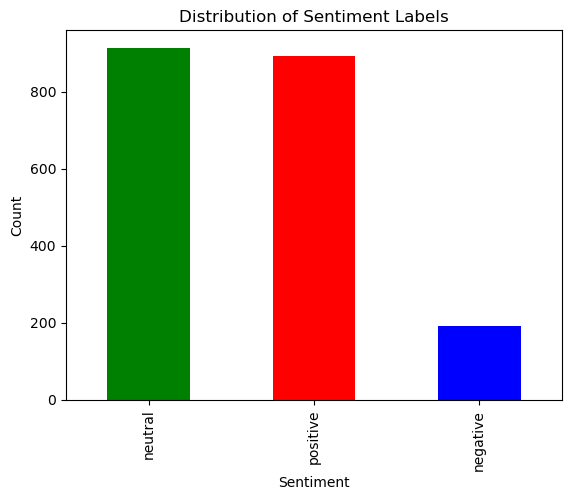

In [75]:
# Plotting the distribution
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# The trained model is applied to new text ("I really enjoyed the movie. It was fantastic!") for sentiment prediction.
# The distribution of text lengths (number of words) in the dataset is visualized using a histogram.
# A bar plot is created to display the top 20 most common words in the cleaned text.
# The distribution of sentiment labels over time is visualized